In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
from PIL import Image
import keras
import os
import cv2

Using TensorFlow backend.


In [31]:
root_dir = '/Volumes/tsanchen/carbs_estimate/error_tolerance_test/new/burger/height/case_3/16_57_25_ECF449F2-F03C-4D89-BD63-85592E196D09'
image_path =  os.path.join(root_dir, 'image.jpg')
peripheral_path = os.path.join(root_dir, 'peripheral.json')

model_path = '/Users/Frost/Desktop/model_checkpoint_06_2.hdf5'

UNIFIED_IMAGE_SIZE = (512, 512)

def center_crop(array):
    assert len(array.shape) >= 2
    if array.shape[0] == array.shape[1]:
        return array
    shape_difference = abs(array.shape[0] - array.shape[1])
    offset = shape_difference // 2
    if array.shape[0] > array.shape[1]:
        return array[offset:array.shape[1] + offset, :]
    else:
        return array[:, offset:array.shape[0] + offset]

def center_normalize(image):
    mean = np.mean(cv2.resize(image, (512, 512)), axis=(0, 1))
    std = np.std(cv2.resize(image, (512, 512)), axis=(0, 1))
    return (image - mean) / std

In [21]:
model = keras.models.load_model(model_path)

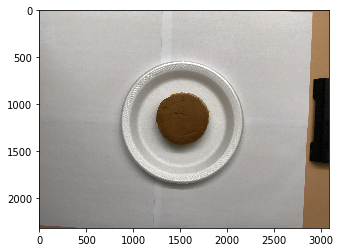

In [32]:
with open(peripheral_path) as in_file:
    json_content = json.loads(in_file.read())
    depth_map = np.array(json_content['depth_data'])
image = np.array(Image.open(image_path))
plt.imshow(image)

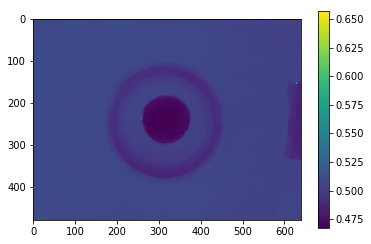

In [33]:
plt.imshow(depth_map)
plt.colorbar()

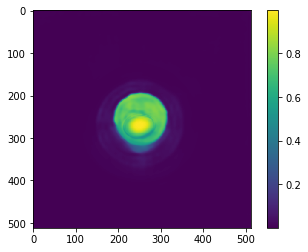

In [34]:
mask = np.reshape(
    model.predict(
        np.reshape(
            center_normalize(
                cv2.resize(
                    center_crop(
                        image
                    ), 
                    UNIFIED_IMAGE_SIZE
                )
            ), 
            (1, *UNIFIED_IMAGE_SIZE, 3)
        )
    ), UNIFIED_IMAGE_SIZE
)
plt.imshow(mask)
plt.colorbar()

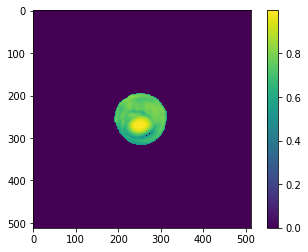

In [35]:
mask[mask < 0.5] = 0
plt.imshow(mask)
plt.colorbar()